# 1: Data Exploration & Preprocessing

## 1.1 Imports

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn

     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.3 MB 93.9 kB/s eta 0:02:01
     ---------------------------------------- 0.0/11.3 MB 93.9 kB/s eta 0:02:01
     ---------------------------------------- 0.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 94.2 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 93.6 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 93.6 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 93.6 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 93.6 kB/s eta 0:00:43
     --------------------------- ------------ 8.9/12.9 MB 93.6 kB/s eta 0:00:43
     --------------------------- -------

In [5]:
# Standard data science imports
import pandas as pd                    # data loading & manipulation
import numpy as np                     # numerical operations

# Preprocessing & clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Dimensionality reduction & evaluation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear inline
%matplotlib inline
sns.set_context("notebook")  # nicer default plot sizes

## 1.2 Load Inspect and Clean Data

In [6]:
# 1. Load the dataset (downloaded from Kaggle, saved in the same directory)
data = pd.read_csv("Mall_Customers.csv")
print("Shape:", data.shape)
data.head()

Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Basic statistics
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check for missing values
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 1.3 Feature Scaling

In [9]:
# Feature scaling:
#    - For clustering we typically standardize continuous features
scaler = StandardScaler()
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scaled_array = scaler.fit_transform(data[features])
scaled_df = pd.DataFrame(scaled_array, columns=[f"{f}_scaled" for f in features])
scaled_df.head()

,Age_scaled,Annual Income (k$)_scaled,Spending Score (1-100)_scaled
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## 1.4 Visualizations

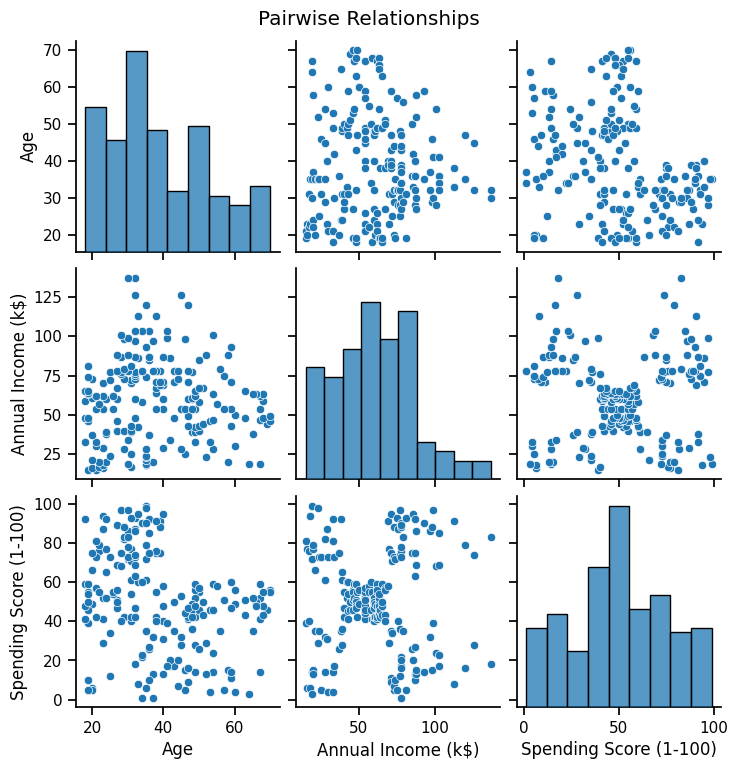

In [10]:
# Pairplot to inspect relationships
sns.pairplot(data[features])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

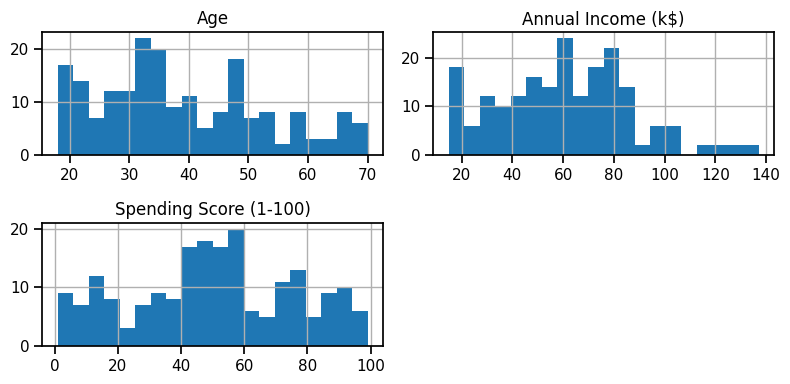

In [11]:
# Histograms to view distributions
data[features].hist(figsize=(8, 4), bins=20)
plt.tight_layout()
plt.show()

# 2: K‑Means Clustering

# 2.1 Find customer segments via K‑Means

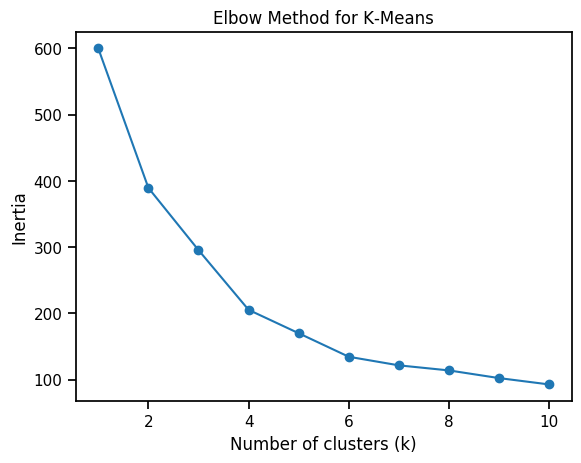

In [12]:
# Elbow method to choose k
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertias.append(km.inertia_)

# Plot elbow curve
plt.plot(K_range, inertias, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K‑Means")
plt.show()

The ideal value of k is 4, because that is where the decrease in inertia reduces significantly, giving us the elbow.

In [13]:
# Fit KMeans with chosen k (k=4)
k_opt = 4  # Based on elbow method
kmeans = KMeans(n_clusters=k_opt, random_state=42)
data["KMeans_Cluster"] = kmeans.fit_predict(scaled_df)

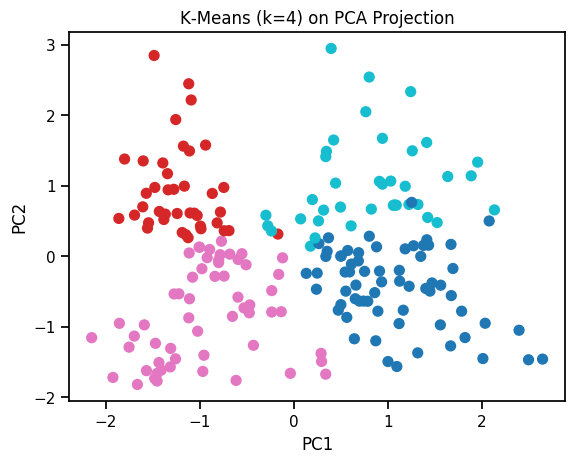

In [14]:
# 2D visualization via PCA
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(scaled_df)
plt.scatter(pcs[:, 0], pcs[:, 1], c=data["KMeans_Cluster"], cmap="tab10", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K‑Means (k={k_opt}) on PCA Projection")
plt.show()

# 3: Hierarchical Clustering

## 3.1 Explore dendrograms and different linkage methods

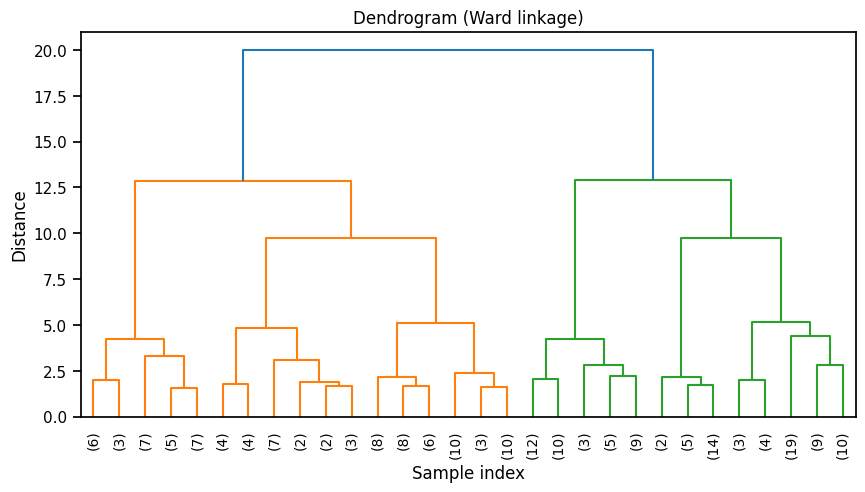

In [15]:
# Create dendrogram (Ward linkage)
linked = linkage(scaled_df, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="lastp", p=30, leaf_rotation=90)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [16]:
# Apply AgglomerativeClustering with various linkages
for link in ["ward", "average", "complete"]:
    ac = AgglomerativeClustering(n_clusters=k_opt, linkage=link)
    data[f"HC_{link}"] = ac.fit_predict(scaled_df)

# Preview hierarchical cluster labels
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,HC_ward,HC_average,HC_complete
0,1,Male,19,15,39,2,0,0,0
1,2,Male,21,15,81,2,1,1,0
2,3,Female,20,16,6,2,0,0,0
3,4,Female,23,16,77,2,1,1,0
4,5,Female,31,17,40,2,0,0,0


# 4: Dimensionality Reduction (PCA)

## 4.1 Assess variance explained and overlay clusters

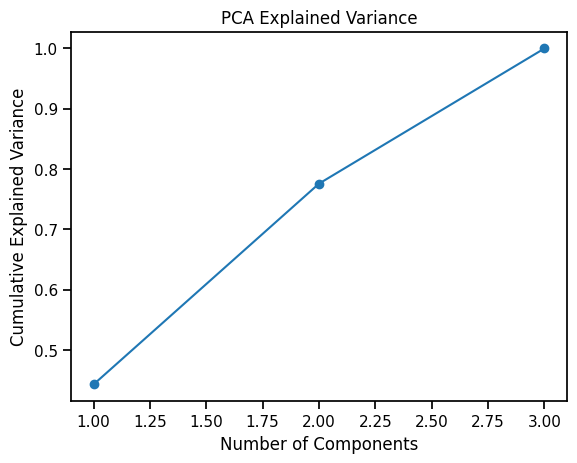

In [17]:
# Explained variance plot
pca_full = PCA().fit(scaled_df)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cum_var) + 1), cum_var, "o-")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

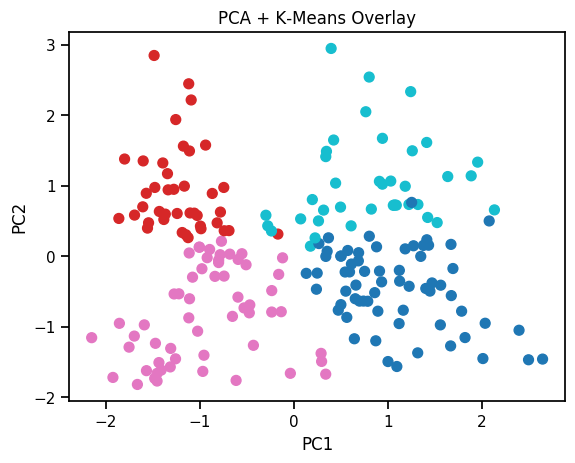

In [18]:
# 2D PCA scatter with K‑Means labels
plt.scatter(pcs[:, 0], pcs[:, 1], c=data["KMeans_Cluster"], cmap="tab10", s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA + K‑Means Overlay")
plt.show()

# 5: Dimensionality Reduction (t‑SNE)

## 5.1 Non‑linear embedding for cluster visualization

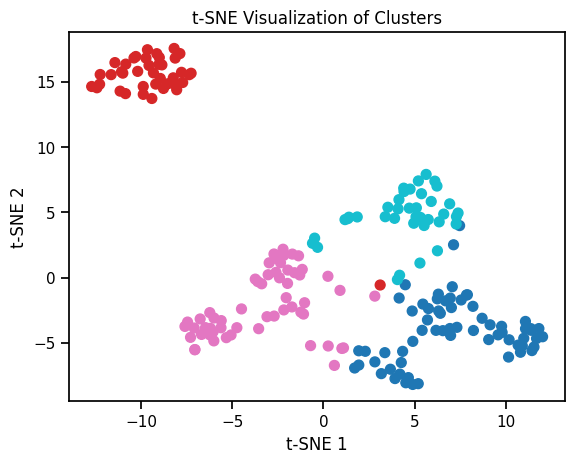

In [19]:
# t-SNE embedding
tsne = TSNE(n_components=2, random_state=42, init="pca")
tsne_results = tsne.fit_transform(scaled_df)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            c=data["KMeans_Cluster"], cmap="tab10", s=50)
plt.xlabel("t‑SNE 1")
plt.ylabel("t‑SNE 2")
plt.title("t‑SNE Visualization of Clusters")
plt.show()

# 6: Silhouette Score

## 6.1 Quantify cluster quality

In [20]:
# Compute silhouette for K‑Means
sil_km = silhouette_score(scaled_df, data["KMeans_Cluster"])
# and for Ward hierarchical
sil_hc = silhouette_score(scaled_df, data["HC_ward"])

print(f"Silhouette Score (K‑Means): {sil_km:.3f}")
print(f"Silhouette Score (Hierarchical, ward): {sil_hc:.3f}")

Silhouette Score (K‑Means): 0.404
Silhouette Score (Hierarchical, ward): 0.361
